'''

Author: Prathamesh Deshpande<br>
Date: 13-11-24<br>
Last modified by: Prathamesh Deshpande<br>
Last modified time:<br>
Title: Linear Regression Model to predict apparent temperature given temperature, humidity, wind speed , wind bearing, visibility, pressure  <br>

'''

Import Libraries

In [207]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
from scipy.stats import zscore

Import the Dataset

In [208]:
df = pd.read_csv("weatherHistory.csv")

In [209]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Analyze the Dataset

In [210]:
df.shape

(96453, 12)

In [211]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [213]:
df2 = df.drop(columns=['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'])

In [214]:
df2

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


Identify missing values

In [215]:
df2.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

Detect Outliers

In [216]:
df3 = df2.drop(columns=['Apparent Temperature (C)'])

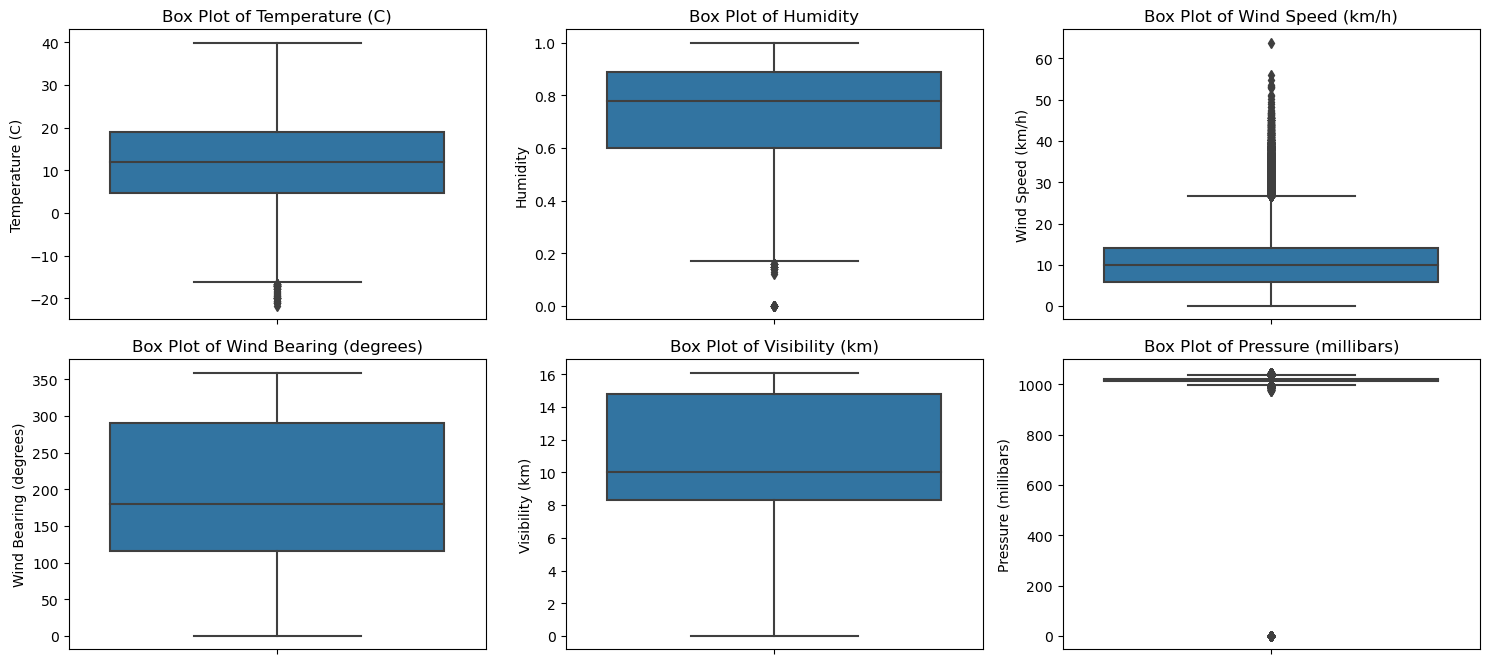

In [217]:
plt.figure(figsize=(15, 10))

# Loop through each feature and create a box plot in its respective subplot
for i, feature in enumerate(df3.columns):
    plt.subplot(3, 3, i + 1)  # Adjust grid dimensions as needed
    sns.boxplot(data=df3, y=feature)
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Remove Outliers using z-score Method

In [218]:
# for column in df2.select_dtypes(include=['float', 'int']).columns:
#     Q1 = df2[column].quantile(0.25)
#     Q3 = df2[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

In [219]:
z_scores = np.abs(zscore(df3))

# Set a threshold for Z-score
threshold = 2

# Filter out rows that have any Z-score above the threshold
data_cleaned = df2[(z_scores < threshold).all(axis=1)]

In [220]:
data_cleaned.shape

(80287, 7)

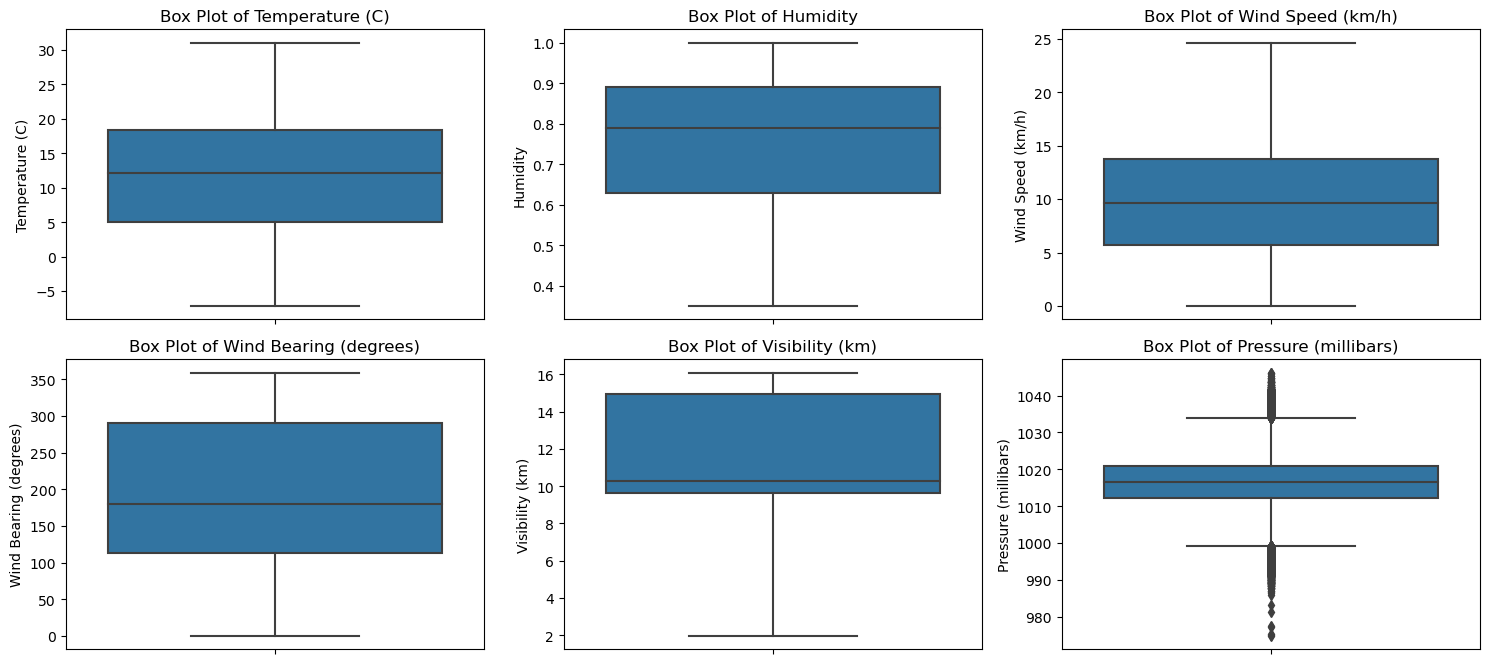

In [221]:
plt.figure(figsize=(15, 10))

# Loop through each feature and create a box plot in its respective subplot
for i, feature in enumerate(data_cleaned.drop(columns=['Apparent Temperature (C)']).columns):
    plt.subplot(3, 3, i + 1)  # Adjust grid dimensions as needed
    sns.boxplot(data=data_cleaned, y=feature)
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Split the dataset into dependent and independent features

In [222]:
x = data_cleaned.drop(columns=['Apparent Temperature (C)'])
y = data_cleaned[['Apparent Temperature (C)']]

In [223]:
x.shape

(80287, 6)

In [224]:
y.shape

(80287, 1)

In [225]:
x.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [226]:
y.head()

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778


Train Test Split

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [228]:
x_train

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
29139,4.444444,0.92,17.7100,140.0,6.1180,1000.80
29900,-5.000000,0.84,12.8800,290.0,4.0250,1021.80
57890,1.111111,0.61,6.4400,130.0,16.1000,1030.60
20052,11.016667,0.46,8.0178,218.0,9.9820,1026.93
80647,7.200000,0.80,14.2807,301.0,9.9820,1028.67
...,...,...,...,...,...,...
25296,8.866667,0.83,3.5742,291.0,7.9051,1032.41
55637,0.000000,0.82,20.9300,290.0,9.9820,1015.50
51114,7.733333,0.75,8.4525,99.0,9.6278,1026.38
52193,18.655556,0.85,12.3004,323.0,10.9480,1016.60


In [229]:
x_test

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
56616,17.688889,0.66,16.9855,10.0,15.8263,1021.17
93645,14.400000,0.77,20.0445,201.0,15.8263,1000.24
76200,10.911111,0.93,6.4400,240.0,11.9784,1016.39
11415,4.977778,0.54,22.7815,168.0,11.2700,1015.11
14010,14.022222,0.51,0.4508,280.0,9.9820,1024.75
...,...,...,...,...,...,...
18864,20.055556,0.79,6.4078,271.0,15.8263,1015.67
47456,3.633333,0.93,10.5455,159.0,5.8765,1021.37
19729,-0.505556,0.87,11.3827,149.0,5.7316,1022.23
96400,23.838889,0.62,3.2200,70.0,16.1000,1018.95


In [230]:
y_train

,Apparent Temperature (C)
29139,0.683333
29900,-10.061111
57890,-0.894444
20052,11.016667
80647,4.577778
...,...
25296,8.866667
55637,-5.355556
51114,6.255556
52193,18.655556


In [231]:
y_test

,Apparent Temperature (C)
56616,17.688889
93645,14.400000
76200,10.911111
11415,0.738889
14010,14.022222
...,...
18864,20.055556
47456,0.922222
19729,-4.250000
96400,23.838889


correlation matrix

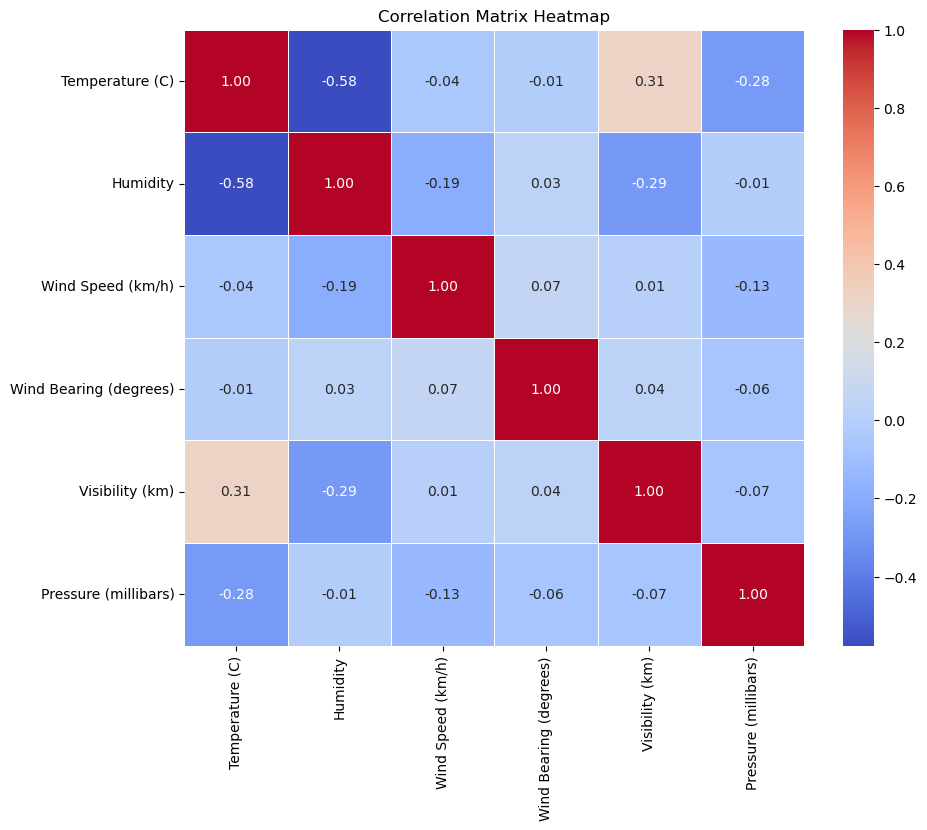

In [206]:
# Calculate the correlation matrix
corr_matrix = data_cleaned.drop(columns=['Apparent Temperature (C)']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix Heatmap")
plt.show()

Feature Scaling

In [232]:
sc = StandardScaler()

In [233]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [234]:
x_train_scaled

array([[-0.87183903,  0.99366273,  1.40114274, -0.43829434, -1.26498479,
        -2.12538934],
       [-1.97161971,  0.52147423,  0.52806053,  0.95770413, -1.82492985,
         0.67999889],
       [-1.25999691, -0.83606772, -0.63604909, -0.5313609 ,  1.40552242,
         1.85559014],
       ...,
       [-0.48885658, -0.00973784, -0.27226484, -0.81986725, -0.326     ,
         1.2918407 ],
       [ 0.78300744,  0.58049779,  0.42329066,  1.2648238 ,  0.02719612,
        -0.01466867],
       [ 0.69179033,  0.81659204,  1.32256534,  1.13453061, -0.23124007,
        -0.2871921 ]])

In [235]:
x_test_scaled

array([[ 0.67044165, -0.5409499 ,  1.27018041, -1.64815968,  1.33229883,
         0.59583724],
       [ 0.2874592 ,  0.10830929,  1.82313247,  0.12941171,  1.33229883,
        -2.20019969],
       [-0.11881272,  1.05268629, -0.63604909,  0.49237131,  0.30286138,
        -0.04272255],
       ...,
       [-1.44825349,  0.69854491,  0.25740504, -0.35453443, -1.36835926,
         0.73744255],
       [ 1.38659295, -0.77704415, -1.2181039 , -1.08976029,  1.40552242,
         0.29926763],
       [ 0.38902718,  0.22635641,  0.07696805, -0.81986725,  1.33229883,
        -0.50627956]])

Model Training

In [236]:
lr = LinearRegression()

In [237]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [238]:
y_pred = lr.predict(x_test_scaled)

In [239]:
y_pred

array([[16.69271481],
       [12.56610063],
       [10.32158956],
       ...,
       [-3.16272894],
       [25.0385322 ],
       [14.65910814]])

Model Evaluation

In [240]:
mse = mean_squared_error(y_test,y_pred)

In [241]:
r2_score = r2_score(y_test,y_pred)

In [242]:
mse,r2_score

(0.8430787817664592, 0.9910321659054828)

Result Visualization

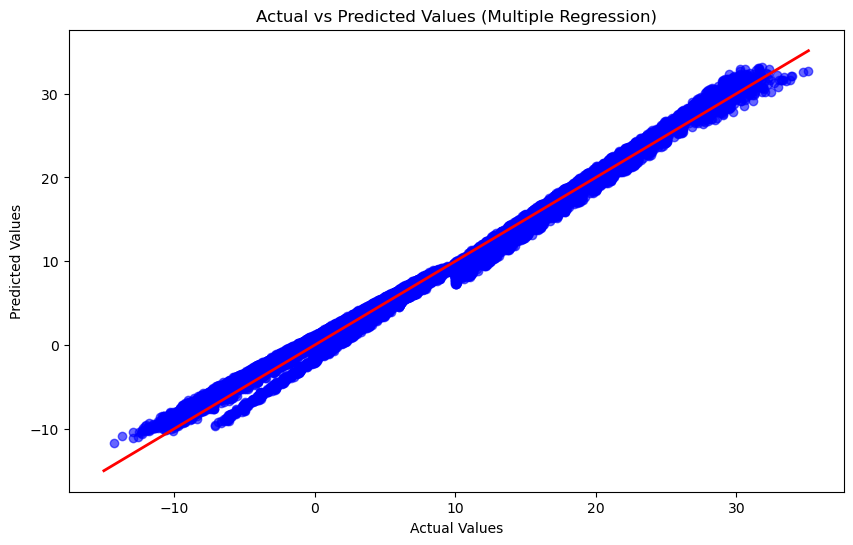

In [243]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Line showing perfect prediction

# Labels and Title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Multiple Regression)")

plt.show()